In [1]:
suppressMessages(suppressWarnings(source("config_sing.R")))
print(FD_WORK)
print(FD_RES)

[1] "/home/mount/work"
[1] "/home/mount/work/out/proj_combeffect"


In [2]:
###################################################
# Import library size
###################################################

### Helper function to get
get_group = function(idn_sample){
    idn = idn_sample
    
    idn = str_replace(
        string = idn, 
        pattern = "Input[0-9]", 
        replacement = "Input")
    
    idn = str_remove(
        string = idn, 
        pattern = "_20x")
    
    idn = str_replace(
        string = idn, 
        pattern = "TFX[0-9]_", 
        replacement="TFX_")
    return(idn)
}

### set path
fdiry = file.path(FD_RES, "source")
fname = "library_size.txt"
fpath = file.path(fdiry, fname)

### import library size
ctypes = c(col_integer(), col_character())
cnames = c("Size", "FPath")
dat_lib = read_tsv(fpath, col_types=ctypes, col_names = cnames)

### remove the total size
dat_lib = dat_lib %>% dplyr::filter(FPath != "total")

### summarize info from the file path
### stackoverflow: Extract only folder name right before filename from full path
dat_lib = dat_lib %>% 
    #mutate(Sample = tools::file_path_sans_ext(basename(FPath))) %>%
    mutate(Sample = basename(dirname(FPath))) %>%
    mutate(Group = get_group(Sample))
dat_lib = dat_lib %>% dplyr::select(Size, Sample, Group)
dat_lib

Size,Sample,Group
<dbl>,<chr>,<chr>
371718546,Input1_20x,Input
18666630,Input1,Input
347635732,Input2_20x,Input
20167924,Input2,Input
349994051,Input3_20x,Input
23280988,Input3,Input
413508358,Input4_20x,Input
19003938,Input4,Input
341110487,Input5_20x,Input


In [3]:
### set samples and path
SAMPLES_TOT = c(
    paste0("Input", 1:5),
    paste0("Input", 1:5, "_20x"),
    paste0("TFX",   2:5, "_DMSO"),
    paste0("TFX",   2:5, "_Dex"))

SAMPLES_INP = c(
    paste0("Input", 1:5),
    paste0("TFX",   2:5, "_DMSO"),
    paste0("TFX",   2:5, "_Dex"))

SAMPLES_INP20X = c(
    paste0("Input", 1:5, "_20x"),
    paste0("TFX",   2:5, "_DMSO"),
    paste0("TFX",   2:5, "_Dex"))

### set column names and types
CTYPES = c(col_character(), col_integer(), col_integer(), col_integer(),
           col_character(), col_integer(), col_integer(),
           col_character(), col_double(),  col_integer())
CNAMES = c("Chrom_Frag", "Start_Frag", "End_Frag", "Count_Frag",
           "Chrom_MTF",  "Start_MTF",  "End_MTF",
           "Motif", "Score", "Overlap")

In [4]:
mtf1 = "AP1_1_merge.bed.gz"
mtf2 = "NR_20_merge.bed.gz"
mtfs = c("AP1_1", "NR_20")
motif_pair = c(mtf1, mtf2)

In [6]:
###
SAMPLES = SAMPLES_INP20X
TARGET = "chr17"

lst_dat = lapply(motif_pair, function(fname){
    lst = lapply(SAMPLES, function(sam){

        
        ### INIT
        fdiry = file.path(FD_RES, "annotation_fragment")
        fpath = file.path(fdiry, sam, TARGET, fname)    
        mtf   = str_remove(fname, "_merge.bed.gz")
        msg   = paste(mtf, "Import", fpath)
        cat(msg, "\n"); flush.console()
        
        ### import data
        dat = read_tsv(fpath, col_types=CTYPES, col_names=CNAMES)
        if (nrow(dat) == 0){
            return(NULL)
        } else {
            ### filtering
            num1 = nrow(dat)
            dat  = dat %>% 
                mutate(Sample = sam) %>%
                mutate(Length_MTF = End_MTF - Start_MTF) %>%
                mutate(Length_Dif = Length_MTF - Overlap) %>%
                dplyr::filter(Length_Dif == 0)
            
            ### PRINT: message
            num2 = nrow(dat)
            msg  = paste(mtf, "Filter", num1, num2)
            cat(msg, "\n"); flush.console()
            return(dat)
        } # end if-else
    }) # end lapply

    ### arrange data
    dat = bind_rows(lst)
    return(dat)
})

AP1_1 Import /home/mount/work/out/proj_combeffect/annotation_fragment/Input1_20x/chr17/AP1_1_merge.bed.gz 
AP1_1 Filter 9624900 9493533 
AP1_1 Import /home/mount/work/out/proj_combeffect/annotation_fragment/Input2_20x/chr17/AP1_1_merge.bed.gz 
AP1_1 Filter 9163291 9038862 
AP1_1 Import /home/mount/work/out/proj_combeffect/annotation_fragment/Input3_20x/chr17/AP1_1_merge.bed.gz 
AP1_1 Filter 9233671 9108283 
AP1_1 Import /home/mount/work/out/proj_combeffect/annotation_fragment/Input4_20x/chr17/AP1_1_merge.bed.gz 
AP1_1 Filter 10647035 10503454 
AP1_1 Import /home/mount/work/out/proj_combeffect/annotation_fragment/Input5_20x/chr17/AP1_1_merge.bed.gz 
AP1_1 Filter 9074018 8951209 
AP1_1 Import /home/mount/work/out/proj_combeffect/annotation_fragment/TFX2_DMSO/chr17/AP1_1_merge.bed.gz 
AP1_1 Filter 1529653 1509314 
AP1_1 Import /home/mount/work/out/proj_combeffect/annotation_fragment/TFX3_DMSO/chr17/AP1_1_merge.bed.gz 
AP1_1 Filter 952900 940175 
AP1_1 Import /home/mount/work/out/proj_comb

In [60]:
head(lst_dat[[1]])

Chrom_Frag,Start_Frag,End_Frag,Count_Frag,Chrom_MTF,Start_MTF,End_MTF,Motif,Score,Overlap,Sample,Length_MTF,Length_Dif
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
chr17,107410,108464,1,chr17,107530,107539,AP1/1,7.1681,9,Input1_20x,9,0
chr17,107410,108464,1,chr17,107990,107998,AP1/1,7.5606,8,Input1_20x,8,0
chr17,159426,160303,1,chr17,160217,160226,AP1/1,7.2250,9,Input1_20x,9,0
chr17,159510,160362,1,chr17,160217,160226,AP1/1,7.2250,9,Input1_20x,9,0
chr17,159510,160362,1,chr17,160301,160309,AP1/1,7.7069,8,Input1_20x,8,0
chr17,159977,160849,1,chr17,160217,160226,AP1/1,7.2250,9,Input1_20x,9,0


In [61]:
###
df1 = lst_dat[[1]]
df2 = lst_dat[[2]]

### extract fragments
dat1 = bind_rows(df1, df2) %>% 
    dplyr::select(Chrom_Frag, Start_Frag, End_Frag, Count_Frag, Sample) %>%
    distinct
dat2 = df1 %>% 
    dplyr::select(Chrom_Frag, Start_Frag, End_Frag, Count_Frag, Sample, Motif, Start_MTF, End_MTF, Score)
dat3 = df2 %>% 
    dplyr::select(Chrom_Frag, Start_Frag, End_Frag, Count_Frag, Sample, Motif, Start_MTF, End_MTF, Score)

### match fragments for the motif pair
dat = dat1 %>%
    full_join(dat2, by = c("Chrom_Frag", "Start_Frag", "End_Frag", "Count_Frag", "Sample")) %>%
    full_join(dat3, by = c("Chrom_Frag", "Start_Frag", "End_Frag", "Count_Frag", "Sample")) %>%
    mutate(Motif = paste(Motif.x, Motif.y, sep = "_")) %>%
    mutate(Motif = str_remove(string=Motif, pattern="_NA|NA_")) %>% 
    mutate(Group = get_group(Sample)) %>%
    mutate(X     = paste(Group, Motif, sep="_")) %>%
    mutate(X     = ifelse(str_detect(X, "Input"), "Input", X))

###
df1 = NULL
df2 = NULL
head(dat)

Chrom_Frag,Start_Frag,End_Frag,Count_Frag,Sample,Motif.x,Start_MTF.x,End_MTF.x,Score.x,Motif.y,Start_MTF.y,End_MTF.y,Score.y,Motif,Group,X
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr17,107410,108464,1,Input1_20x,AP1/1,107530,107539,7.1681,NA,NA,NA,NA,AP1/1,Input,Input
chr17,107410,108464,1,Input1_20x,AP1/1,107990,107998,7.5606,NA,NA,NA,NA,AP1/1,Input,Input
chr17,159426,160303,1,Input1_20x,AP1/1,160217,160226,7.2250,NA,NA,NA,NA,AP1/1,Input,Input
chr17,159510,160362,1,Input1_20x,AP1/1,160217,160226,7.2250,NA,NA,NA,NA,AP1/1,Input,Input
chr17,159510,160362,1,Input1_20x,AP1/1,160301,160309,7.7069,NA,NA,NA,NA,AP1/1,Input,Input
chr17,159977,160849,1,Input1_20x,AP1/1,160217,160226,7.2250,NA,NA,NA,NA,AP1/1,Input,Input


In [64]:
dat_mtf_dist = dat %>% dplyr::filter(Motif == "AP1/1_NR/20")
head(dat_mtf_dist)

Chrom_Frag,Start_Frag,End_Frag,Count_Frag,Sample,Motif.x,Start_MTF.x,End_MTF.x,Score.x,Motif.y,Start_MTF.y,End_MTF.y,Score.y,Motif,Group,X
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr17,174938,176057,1,Input1_20x,AP1/1,174968,174976,8.0116,NR/20,175700,175714,7.3894,AP1/1_NR/20,Input,Input
chr17,174938,176057,1,Input1_20x,AP1/1,174968,174976,8.0116,NR/20,175776,175790,8.5107,AP1/1_NR/20,Input,Input
chr17,174938,176057,1,Input1_20x,AP1/1,175271,175279,7.6685,NR/20,175700,175714,7.3894,AP1/1_NR/20,Input,Input
chr17,174938,176057,1,Input1_20x,AP1/1,175271,175279,7.6685,NR/20,175776,175790,8.5107,AP1/1_NR/20,Input,Input
chr17,174938,176057,1,Input1_20x,AP1/1,175919,175927,7.8941,NR/20,175700,175714,7.3894,AP1/1_NR/20,Input,Input
chr17,174938,176057,1,Input1_20x,AP1/1,175919,175927,7.8941,NR/20,175776,175790,8.5107,AP1/1_NR/20,Input,Input


In [65]:
dat_mtf_dist %>% dplyr::select(Sample, Group, X) %>% distinct

Sample,Group,X
<chr>,<chr>,<chr>
Input1_20x,Input,Input
Input2_20x,Input,Input
Input3_20x,Input,Input
Input4_20x,Input,Input
Input5_20x,Input,Input
TFX2_DMSO,TFX_DMSO,TFX_DMSO_AP1/1_NR/20
TFX3_DMSO,TFX_DMSO,TFX_DMSO_AP1/1_NR/20
TFX4_DMSO,TFX_DMSO,TFX_DMSO_AP1/1_NR/20
TFX5_DMSO,TFX_DMSO,TFX_DMSO_AP1/1_NR/20


In [67]:
fdiry = file.path(FD_RES, 'model_linear', 'distance', 'chr17')
fname = "frag_AP1_1_NR_20.tsv"
fpath = file.path(fdiry, fname)
print(fpath)

write_tsv(dat_mtf_dist, fpath)

[1] "/home/mount/work/out/proj_combeffect/model_linear/distance/chr17/frag_AP1_1_NR_20.tsv"


In [8]:
tmp = dat %>% dplyr::filter(Motif == "AP1/1_NR/20") %>% mutate(Dist_MTF = abs(Start_MTF.x - Start_MTF.y))
tmp = tmp %>% group_by(Sample, X, Dist_MTF) %>% summarise(Value = sum(Count_Frag), .groups = 'drop')
head(tmp)

Sample,X,Dist_MTF,Value
<chr>,<chr>,<dbl>,<dbl>
Input1_20x,Input,0,676
Input1_20x,Input,1,914
Input1_20x,Input,2,6681
Input1_20x,Input,3,6468
Input1_20x,Input,4,4062
Input1_20x,Input,5,1579


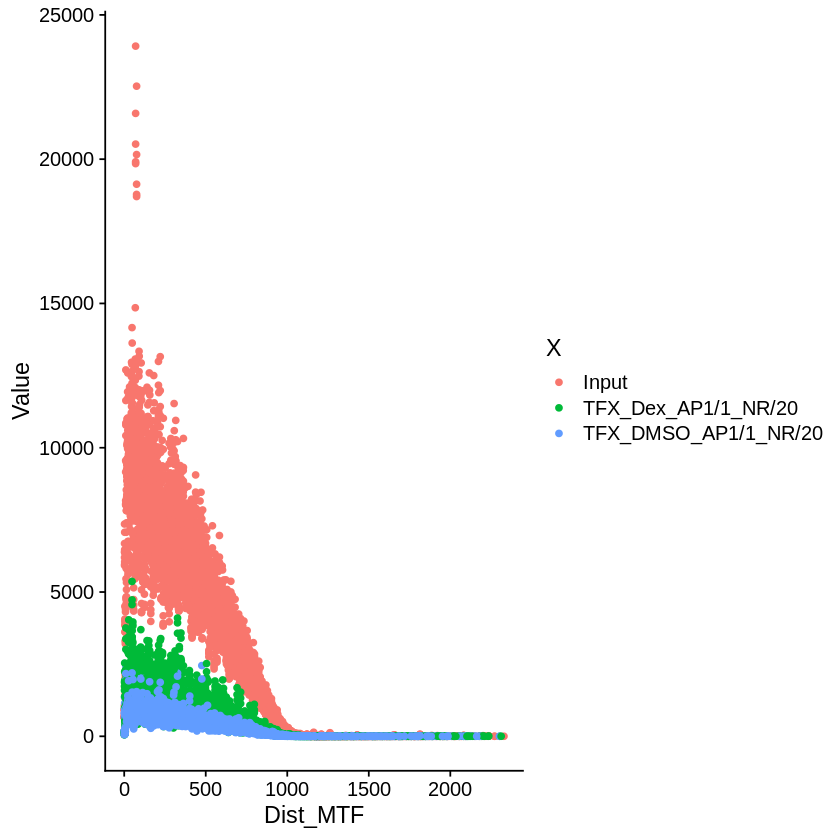

In [9]:
gpt = ggplot(tmp, aes(x=Dist_MTF, y=Value, color=X)) + geom_point() + theme_cowplot()
print(gpt)

In [17]:
dat_mtf_dist = dat %>% 
    dplyr::filter(Motif == "AP1/1_NR/20") %>% 
    mutate(Dist_MTF_val = abs(Start_MTF.x - Start_MTF.y)) %>%
    mutate(Dist_MTF_cat = cut(Dist_MTF_val, breaks = seq(0, 2400, by = 100)))

In [23]:
head(dat_mtf_dist)

Chrom_Frag,Start_Frag,End_Frag,Count_Frag,Sample,Motif.x,Start_MTF.x,End_MTF.x,Motif.y,Start_MTF.y,End_MTF.y,Motif,Group,X,Dist_MTF_val,Dist_MTF_cat
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<fct>
chr17,174938,176057,1,Input1_20x,AP1/1,174968,174976,NR/20,175700,175714,AP1/1_NR/20,Input_20x,Input,732,"(700,800]"
chr17,174938,176057,1,Input1_20x,AP1/1,174968,174976,NR/20,175776,175790,AP1/1_NR/20,Input_20x,Input,808,"(800,900]"
chr17,174938,176057,1,Input1_20x,AP1/1,175271,175279,NR/20,175700,175714,AP1/1_NR/20,Input_20x,Input,429,"(400,500]"
chr17,174938,176057,1,Input1_20x,AP1/1,175271,175279,NR/20,175776,175790,AP1/1_NR/20,Input_20x,Input,505,"(500,600]"
chr17,174938,176057,1,Input1_20x,AP1/1,175919,175927,NR/20,175700,175714,AP1/1_NR/20,Input_20x,Input,219,"(200,300]"
chr17,174938,176057,1,Input1_20x,AP1/1,175919,175927,NR/20,175776,175790,AP1/1_NR/20,Input_20x,Input,143,"(100,200]"


In [59]:
dat_mtf_dist %>% dplyr::filter(is.na(Dist_MTF_cat)) %>% dplyr::select(Dist_MTF_val, Dist_MTF_cat) 

Chrom_Frag,Start_Frag,End_Frag,Count_Frag,Sample,Motif.x,Start_MTF.x,End_MTF.x,Motif.y,Start_MTF.y,End_MTF.y,Motif,Group,X,Dist_MTF_val,Dist_MTF_cat
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<fct>
chr17,8915663,8916721,1,Input1_20x,AP1/1,8916590,8916598,NR/20,8916590,8916604,AP1/1_NR/20,Input_20x,Input,0,NA
chr17,8915678,8916771,1,Input1_20x,AP1/1,8916590,8916598,NR/20,8916590,8916604,AP1/1_NR/20,Input_20x,Input,0,NA
chr17,8915689,8916695,1,Input1_20x,AP1/1,8916590,8916598,NR/20,8916590,8916604,AP1/1_NR/20,Input_20x,Input,0,NA
chr17,8915693,8916728,1,Input1_20x,AP1/1,8916590,8916598,NR/20,8916590,8916604,AP1/1_NR/20,Input_20x,Input,0,NA
chr17,8915696,8916711,1,Input1_20x,AP1/1,8916590,8916598,NR/20,8916590,8916604,AP1/1_NR/20,Input_20x,Input,0,NA
chr17,8915706,8916685,1,Input1_20x,AP1/1,8916590,8916598,NR/20,8916590,8916604,AP1/1_NR/20,Input_20x,Input,0,NA


In [32]:
### summarize into counts
dat = dat_mtf_dist
dat = dat %>% 
    group_by(Sample, Group, Dist_MTF_cat) %>% 
    summarise(Value = sum(Count_Frag), .groups = 'drop') %>%
    dplyr::select(-Group)

### normalize counts by library size
dat = dat %>% left_join(dat_lib, by="Sample")
dat = dat %>%
    mutate(Norm_Value    = Value / Size) %>% 
    mutate(Lognorm_Value = log2(Value) - log2(Size))

head(dat)

Sample,Dist_MTF_cat,Value,Size,Group,Norm_Value,Lognorm_Value
<chr>,<fct>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Input1_20x,"(0,100]",878483,371718546,Input,0.002363302,-8.724981
Input1_20x,"(100,200]",834133,371718546,Input,0.002243991,-8.799718
Input1_20x,"(200,300]",729946,371718546,Input,0.001963706,-8.992205
Input1_20x,"(300,400]",673387,371718546,Input,0.001811551,-9.108559
Input1_20x,"(400,500]",574005,371718546,Input,0.001544193,-9.338932
Input1_20x,"(500,600]",456278,371718546,Input,0.001227482,-9.670082


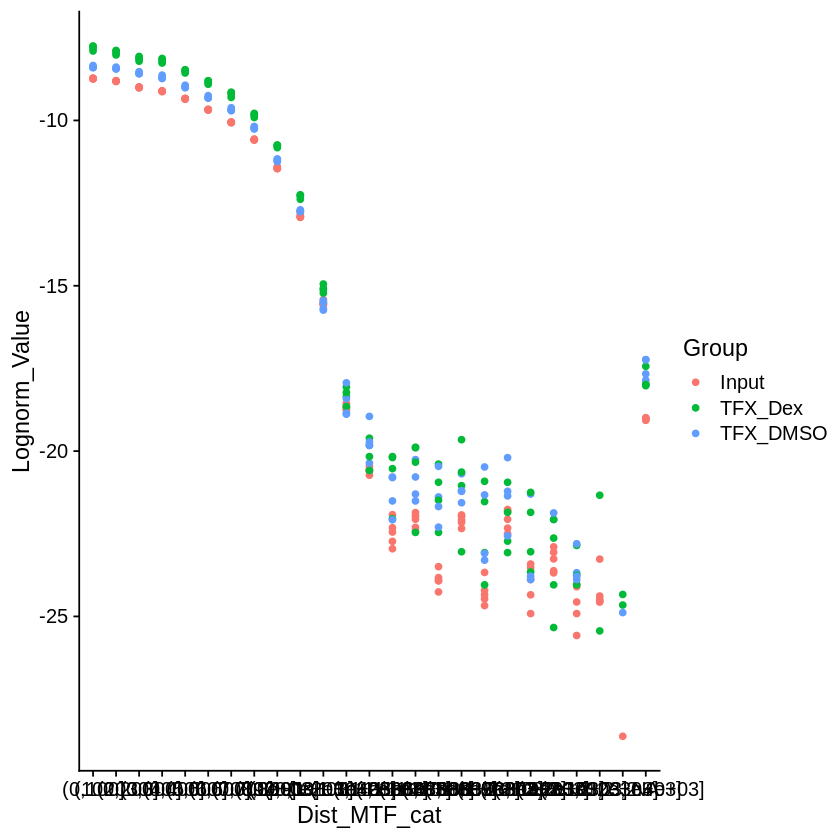

In [33]:
gpt = ggplot(dat, aes(x=Dist_MTF_cat, y=Lognorm_Value, color=Group)) + geom_point() + theme_cowplot()
print(gpt)

In [42]:
tmp1 = dat %>% 
    dplyr::filter(Group == "Input") %>% 
    group_by(Dist_MTF_cat) %>% 
    summarize(Norm_Value_Input = mean(Norm_Value), .groups = 'drop') 

tmp2 = dat %>% 
    dplyr::filter(Group == "TFX_DMSO") %>% 
    group_by(Dist_MTF_cat) %>% 
    summarize(Norm_Value_DMSO = mean(Norm_Value), .groups = 'drop') 

tmp3 = dat %>% 
    dplyr::filter(Group == "TFX_Dex") %>% 
    group_by(Dist_MTF_cat) %>% 
    summarize(Norm_Value_Dex = mean(Norm_Value), .groups = 'drop') 

In [43]:
print(head(tmp1, 3))
print(head(tmp2, 3))
print(head(tmp3, 3))

# A tibble: 3 × 2
  Dist_MTF_cat Norm_Value_Input
  <fct>                   <dbl>
1 (0,100]               0.00235
2 (100,200]             0.00223
3 (200,300]             0.00195
# A tibble: 3 × 2
  Dist_MTF_cat Norm_Value_DMSO
  <fct>                  <dbl>
1 (0,100]              0.00299
2 (100,200]            0.00291
3 (200,300]            0.00264
# A tibble: 3 × 2
  Dist_MTF_cat Norm_Value_Dex
  <fct>                 <dbl>
1 (0,100]             0.00446
2 (100,200]           0.00407
3 (200,300]           0.00358


In [45]:
tmp = tmp1 %>% left_join(tmp2, by="Dist_MTF_cat") %>% left_join(tmp3, by="Dist_MTF_cat")
tmp = tmp  %>% 
    mutate(Ratio_DMSO = Norm_Value_DMSO / Norm_Value_Input) %>%
    mutate(Ratio_Dex  = Norm_Value_Dex  / Norm_Value_Input)
head(tmp)

Dist_MTF_cat,Norm_Value_Input,Norm_Value_DMSO,Norm_Value_Dex,Ratio_DMSO,Ratio_Dex
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"(0,100]",0.002350507,0.002994893,0.004461885,1.274147,1.898265
"(100,200]",0.002232529,0.002913752,0.004067408,1.305135,1.821883
"(200,300]",0.001954258,0.002635313,0.003575475,1.348498,1.829582
"(300,400]",0.001803077,0.002417254,0.003423487,1.340627,1.898691
"(400,500]",0.001540275,0.001975971,0.002755910,1.282869,1.789232
"(500,600]",0.001223697,0.001584873,0.002176306,1.295152,1.778468


In [56]:
tail(tmp)

Dist_MTF_cat,Norm_Value_Input,Norm_Value_DMSO,Norm_Value_Dex,Ratio_DMSO,Ratio_Dex
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"(1.9e+03,2e+03]",6.308994e-08,1.738841e-07,2.143570e-07,2.756130,3.397641
"(2e+03,2.1e+03]",9.879923e-08,2.445408e-07,1.157152e-07,2.475129,1.171216
"(2.1e+03,2.2e+03]",4.124988e-08,8.633465e-08,8.694801e-08,2.092967,2.107837
"(2.2e+03,2.3e+03]",5.381148e-08,NA,2.000894e-07,NA,3.718340
"(2.3e+03,2.4e+03]",2.418331e-09,3.230858e-08,4.257385e-08,13.359867,17.604642
NA,1.878223e-06,5.500243e-06,4.282522e-06,2.928429,2.280093


In [50]:
dat = tmp %>% 
    dplyr::select(Dist_MTF_cat, Ratio_DMSO, Ratio_Dex) %>% 
    gather(Group, Value, -Dist_MTF_cat)
head(dat)

Dist_MTF_cat,Group,Value
<fct>,<chr>,<dbl>
"(0,100]",Ratio_DMSO,1.274147
"(100,200]",Ratio_DMSO,1.305135
"(200,300]",Ratio_DMSO,1.348498
"(300,400]",Ratio_DMSO,1.340627
"(400,500]",Ratio_DMSO,1.282869
"(500,600]",Ratio_DMSO,1.295152


In [55]:
tail(dat)

Dist_MTF_cat,Group,Value
<fct>,<chr>,<dbl>
"(1.9e+03,2e+03]",Ratio_Dex,3.397641
"(2e+03,2.1e+03]",Ratio_Dex,1.171216
"(2.1e+03,2.2e+03]",Ratio_Dex,2.107837
"(2.2e+03,2.3e+03]",Ratio_Dex,3.718340
"(2.3e+03,2.4e+03]",Ratio_Dex,17.604642
NA,Ratio_Dex,2.280093


Warning message:
“Removed 1 rows containing missing values (geom_point).”


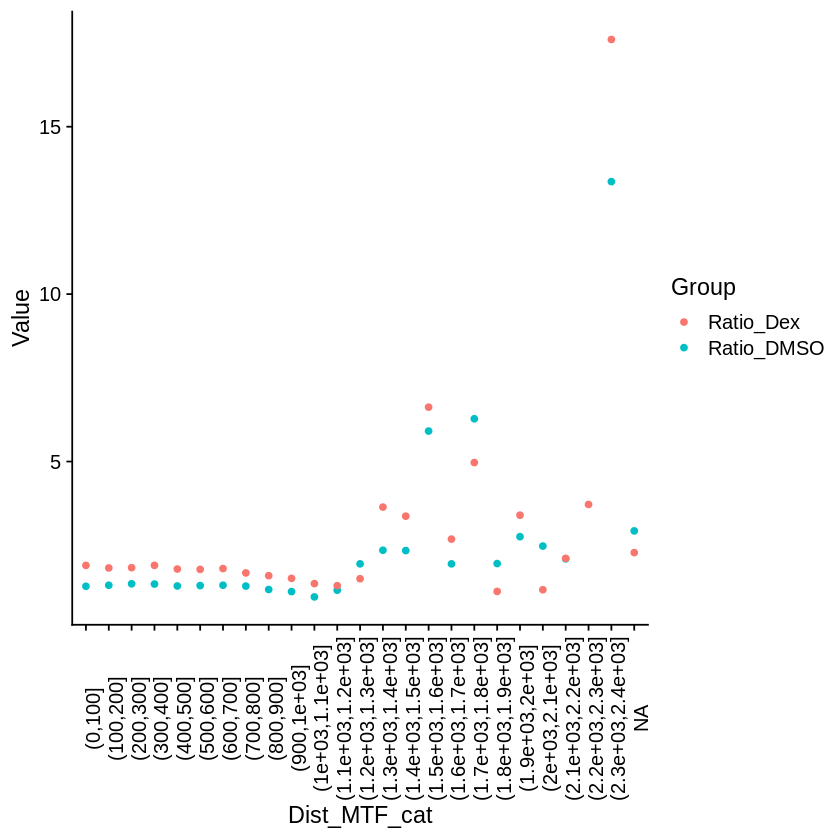

In [54]:
gpt = ggplot(dat, aes(x=Dist_MTF_cat, y=Value, color=Group)) + 
    geom_point() + 
    theme_cowplot() + 
    theme(axis.text.x = element_text(angle=90))
print(gpt)

In [12]:
print(range(tmp$Dist_MTF))

[1]    0 2329


In [13]:
seq(0, 200, by = 50)

[1]   0  50 100 150 200

In [16]:
cut(head(tmp$Dist_MTF, 20), breaks = seq(0, 1000, by = 100))

[1] (700,800] (800,900] (400,500] (500,600] (200,300] (100,200] (400,500]
 [8] (500,600] (200,300] (100,200] (600,700] (500,600] (600,700] (500,600]
[15] (600,700] (500,600] (0,100]   (0,100]   (100,200] (500,600]
10 Levels: (0,100] (100,200] (200,300] (300,400] (400,500] ... (900,1e+03]